# **MNIST SIGN LANGUAGE PREDICTION**

Sign Language image Classification is a drop-In replacement for MNIST for Hand Gesture Recognition Tasks.The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0–25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of the label, pixel1, pixel2….pixel784 which represent a single 28×28 pixel image with grayscale values between 0–255.





***Importing the libraries***

In [0]:
import numpy as np
import pandas as pd
import os
from random import shuffle
#from tqdm import tqdm
from google.colab import drive
drive.mount("/content/drive")



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**`Splitting the data set into train,test and validation data`**

In [0]:
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm
train_data = pd.read_csv("/content/drive/My Drive/Data/sign_mnist/sign_mnist_train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Data/sign_mnist/sign_mnist_test.csv")
#shuffle(train_data)


In [0]:
X = np.array(train_data.iloc[:,1:])

y = train_data.iloc[:,0]
#print(y[i])
n = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z"
n = n.split()
#print(n)
yval = dict((i,n) for i,n in enumerate(n))
print(yval)
for i in tqdm(range(len(y))):
    a = y[i]
    
    #print(y[i])
    y[i] =yval[a]
y = to_categorical(y)



  0%|          | 0/27455 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
  0%|          | 2/27455 [00:00<42:05, 10.87it/s]

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


 16%|█▋        | 4498/27455 [08:35<45:39,  8.38it/s]

KeyboardInterrupt: ignored

In [0]:
plt.imshow(y[100,:].reshape(28,28), cmap='gray', interpolation='none')

ValueError: ignored

In [0]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 0)

X_test = np.array(test_data.iloc[:,1:])
y_test= to_categorical(np.array(test_data.iloc[:,0]))


After loading and splitting the data, preprocess them by reshaping them into the shape the network expects and scaling them so that all values are in the [0, 1] interval. Previously, for instance, the training data were stored in an array of shape (27455, 28, 28) of type uint8 with values in the [0, 255] interval. I transform it into a float32 array of shape (27455, 28 * 28) with values between 0 and 1

In [0]:
img_rows , img_col =28,28
input_shape = (img_rows,img_col,1)

X_train = X_train.reshape(X_train.shape[0], img_rows,img_col,1)
X_train = X_train.astype("float32")
X_train /= 255

X_test = X_test.reshape(X_test.shape[0], img_rows,img_col,1)
X_test = X_test.astype("float32")
X_test /= 255

X_val = X_val.reshape(X_val.shape[0], img_rows,img_col,1)
X_val = X_val.astype("float32")
X_val /= 255

***Importing the layers of Keras.***

To Accelerate the Training of Deep Neural Networks Batch Normalization is used.

Using batch normalization makes the network more stable during training.This may require the use of much larger than normal learning rates, that in turn may further speed up the learning process.

Batch normalization offers some regularization effect, reducing generalization error, perhaps no longer requiring the use of dropout for regularization. Hence removed the dropouts



In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers.normalization import BatchNormalization

conv1 = Sequential()
conv1.add(Conv2D(32, kernel_size=(3,3),activation = 'relu', input_shape= input_shape ))
conv1.add(BatchNormalization())

conv1.add(Conv2D(32, kernel_size=(3,3),activation = 'relu' ))
conv1.add(BatchNormalization())
conv1.add(MaxPooling2D(pool_size = (2,2)))
#conv1.add(Dropout(0.2))

conv1.add(Conv2D(64, kernel_size=(3,3),activation = 'relu' ))
conv1.add(BatchNormalization())
conv1.add(MaxPooling2D(pool_size = (2,2)))
#conv1.add(Dropout(0.2))

conv1.add(Conv2D(128, kernel_size=(3,3),activation = 'relu' ))
conv1.add(MaxPooling2D(pool_size = (2,2)))

conv1.add(Flatten())
conv1.add(Dense(128,activation = 'relu'))
conv1.add(Dense(25, activation = 'softmax'))


W0706 18:21:02.780138 140480909330304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 18:21:02.802352 140480909330304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 18:21:02.806515 140480909330304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 18:21:02.840367 140480909330304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0706 18:21:02.841589 1404809093

**Summary of the Model to be Trained**



When compiling the model, I choose categorical_crossentropy as the loss function (which is relevent for multiclass, single-label classification problem) and Adam optimizer.

 *   The cross-entropy loss calculates the error rate between the predicted value and the original value. Categorical is used because there are 25 classes to predict from. If there were 2 classes, I would have used binary_crossentropy.
 *    The Adam optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. 









In [0]:
conv1.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adam(),
             metrics = ["accuracy"])
conv1.summary()

W0706 18:21:03.233953 140480909330304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 64)        256       
__________

*Training the data for 15 epochs involving 21964 training samples and 5491 validation samples*

In [0]:
history1 = conv1.fit(X_train,y_train,
                    batch_size = 128,
                    epochs = 15,
                    verbose = 1,
                    validation_data = (X_val,y_val))

W0706 18:21:03.374479 140480909330304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 21964 samples, validate on 5491 samples
Epoch 1/15
21964/21964 [==============================] - 75s 3ms/step - loss: 0.5877 - acc: 0.8449 - val_loss: 0.0435 - val_acc: 0.9989
Epoch 2/15
21964/21964 [==============================] - 74s 3ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 3/15
21964/21964 [==============================] - 74s 3ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 4/15
21964/21964 [==============================] - 74s 3ms/step - loss: 7.5627e-04 - acc: 1.0000 - val_loss: 9.9486e-04 - val_acc: 1.0000
Epoch 5/15
21964/21964 [==============================] - 74s 3ms/step - loss: 4.5797e-04 - acc: 1.0000 - val_loss: 6.1103e-04 - val_acc: 1.0000
Epoch 6/15
21964/21964 [==============================] - 75s 3ms/step - loss: 3.0489e-04 - acc: 1.0000 - val_loss: 4.2133e-04 - val_acc: 1.0000
Epoch 7/15
21964/21964 [==============================] - 74s 3ms/step - loss: 2.2165e-04 - acc: 1.0000 -

*Viewing the accuracy Score*

In [0]:
score1 = conv1.evaluate(X_test,y_test,
                       verbose =0)
print("test loss: ",score1[0])
print("test_accuracy : ",score1[1])

test loss:  0.17451627972825107
test_accuracy :  0.9517568321249302


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history["acc"]
val_acc = history1.history["val_acc"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(len(accuracy))
print(len(accuracy))

15


*`Plotting the  data to view the Training and Validation accuracy and losses`*

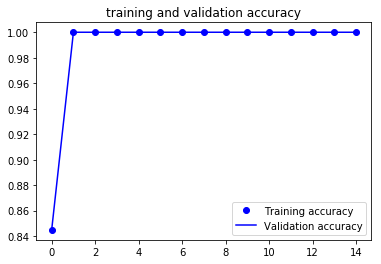

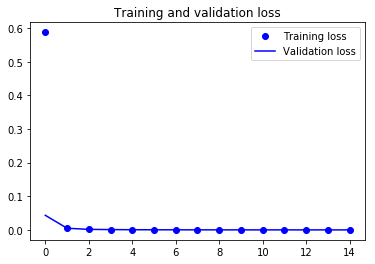

In [0]:
plt.plot(epochs,accuracy,'bo',label = 'Training accuracy')
plt.plot(epochs,accuracy,'b',label = 'Validation accuracy')
plt.title("training and validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = conv1.predict_classes(X_test)

y_true = test_data.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


*`Classification_report library helps in producing the range of prediction occured on each labels. f1 score will give us the prediction rate on each labels`*

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(24)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       0.94      1.00      0.97       245
     Class 4       0.95      0.93      0.94       498
     Class 5       1.00      1.00      1.00       247
     Class 6       0.94      0.98      0.96       348
     Class 7       0.99      0.95      0.97       436
     Class 8       1.00      0.95      0.98       288
     Class 9       1.00      0.96      0.98       331
    Class 10       1.00      1.00      1.00       209
    Class 11       0.80      0.92      0.86       394
    Class 12       0.94      0.77      0.85       291
    Class 13       1.00      1.00      1.00       246
    Class 14       0.92      1.00      0.96       347
    Class 15       0.99      1.00      1.00       164
    Class 16       0.80      0.89      0.84       144
    Class 17       0.95    

***Plotting the correctly predicted images***

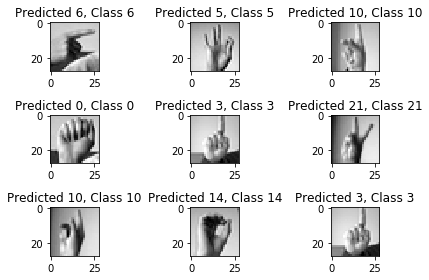

In [0]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()
    

***Plotting the correctly predicted images***

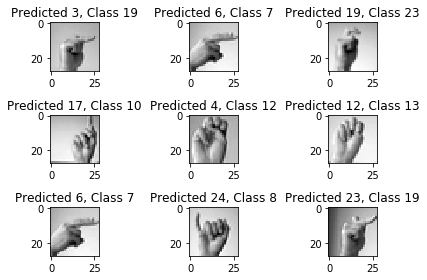

In [0]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()